In [1]:
# imports
from tensorflow.keras.models import Model, load_model
from skimage.measure import compare_ssim as ssim
import pickle
from tensorflow.keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# perceptual loss

from tensorflow.keras.applications.vgg16 import VGG16
def perceptual_loss(y_true, y_pred):
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
    loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)
    loss_model.trainable = False
    return K.mean(K.square(loss_model(y_true) - loss_model(y_pred)))

In [3]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

# Pixelation - 32

In [4]:
# load validation dataset

pickle_in = open('../custom_images/pixelated-32.pickle', 'rb')
X1 = pickle.load(pickle_in)
X1 = np.array(X1)

pickle_in1 = open('../custom_images/original.pickle', 'rb')
y1 = pickle.load(pickle_in1)
y1 = np.array(y1)

In [5]:
# load custom dataset

pickle_in = open('../custom_images/pixelated-32-prakhar.pickle', 'rb')
X2 = pickle.load(pickle_in)
X2 = np.array(X2)

pickle_in1 = open('../custom_images/original-prakhar.pickle', 'rb')
y2 = pickle.load(pickle_in1)
y2 = np.array(y2)

In [6]:
X_test = np.concatenate((X1, X2))
y_test = np.concatenate((y1, y2))

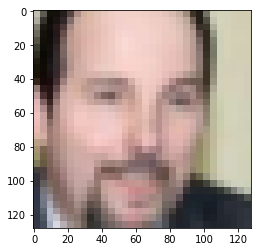

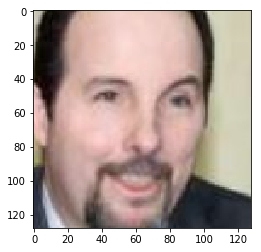

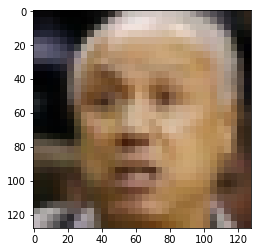

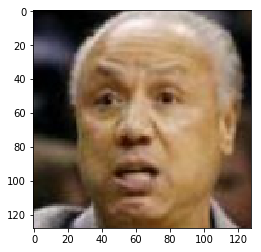

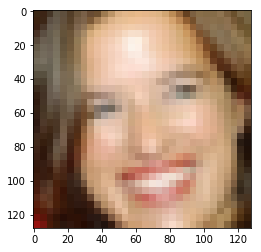

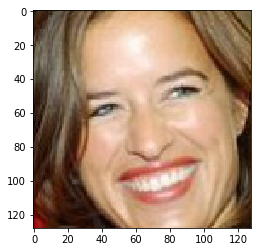

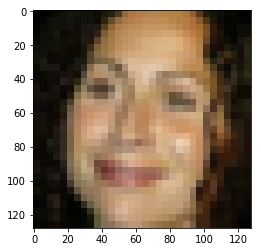

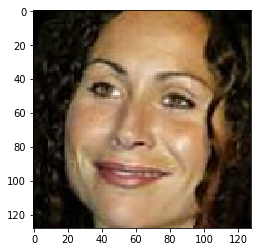

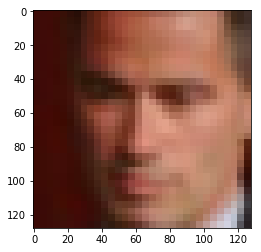

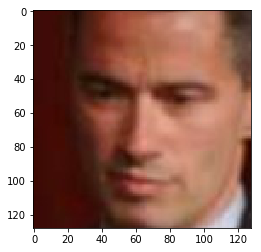

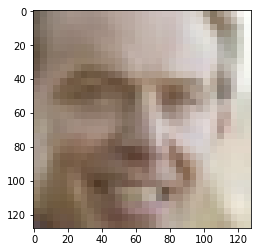

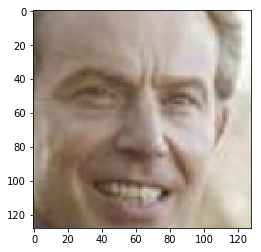

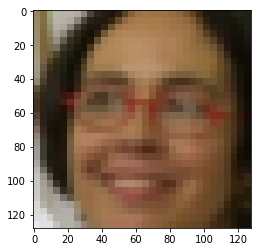

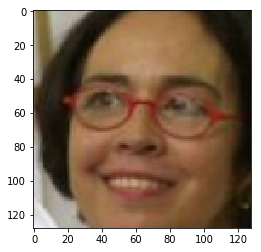

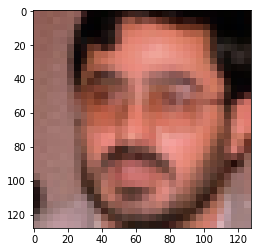

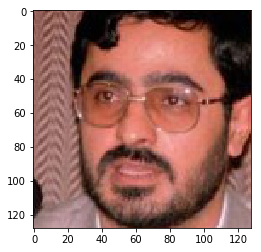

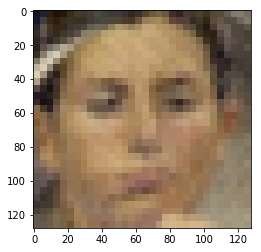

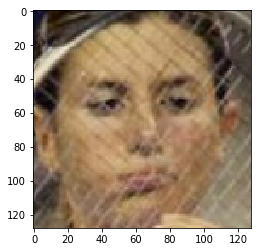

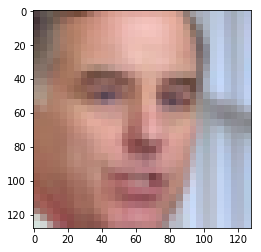

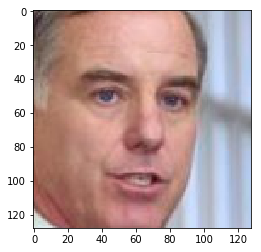

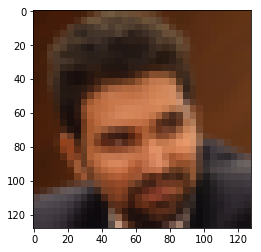

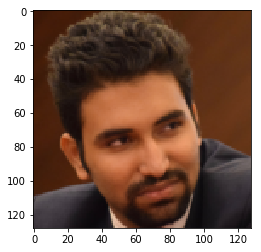

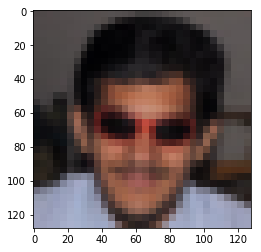

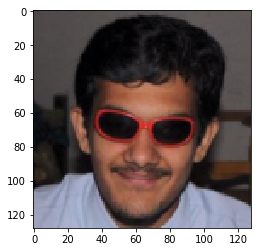

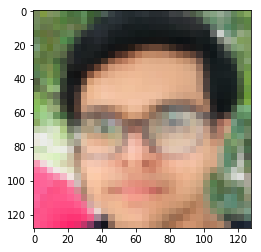

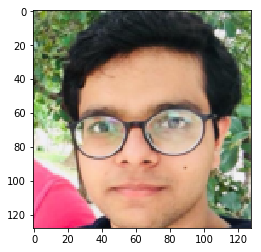

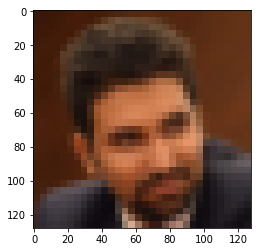

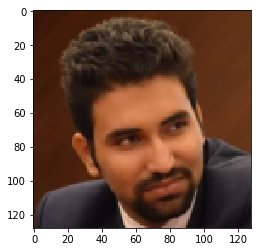

In [7]:
for i in range(14):
    plt.imshow(X_test[i])
    plt.show()
    plt.imshow(y_test[i])
    plt.show()

In [8]:
# load pre-trained model
autoencoder = load_model('hamara_auto_32_pixelated-1556731479.hd5', custom_objects={'perceptual_loss':perceptual_loss})

Obfuscated


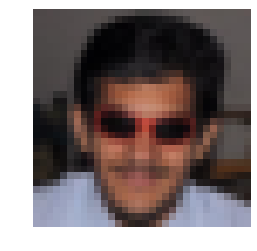

Reconstructed


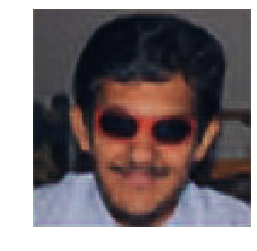

Original


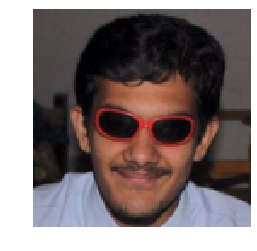

In [9]:
# choose image
i = 11

original = y_test[i]
obfuscated = X_test[i]
predicted = autoencoder.predict(np.array([X_test[i]]))

print("Obfuscated")
plt.axis('off')
plt.imshow(obfuscated)
plt.show()

print("Reconstructed")
plt.axis('off')
plt.imshow(predicted[0])
plt.show()

print("Original")
plt.axis('off')
plt.imshow(original)
plt.show()

In [10]:
# Evaluation
ssim_value = ssim(obfuscated, original, multichannel=True) # b/w obfuscated and original
print(ssim_value)

0.8361716481975563


In [11]:
# Evaluation
ssim_value = ssim(np.array(predicted[0], dtype='float'), original, multichannel=True) # b/w reconstructed and original
print(ssim_value)

0.8815722877122262


# Pixelation - 20

In [12]:
# load validation dataset

pickle_in = open('../custom_images/pixelated-20.pickle', 'rb')
X1 = pickle.load(pickle_in)
X1 = np.array(X1)

pickle_in1 = open('../custom_images/original.pickle', 'rb')
y1 = pickle.load(pickle_in1)
y1 = np.array(y1)

In [13]:
# load custom dataset

pickle_in = open('../custom_images/pixelated-20-prakhar.pickle', 'rb')
X2 = pickle.load(pickle_in)
X2 = np.array(X2)

pickle_in1 = open('../custom_images/original-prakhar.pickle', 'rb')
y2 = pickle.load(pickle_in1)
y2 = np.array(y2)

In [14]:
X_test = np.concatenate((X1, X2))
y_test = np.concatenate((y1, y2))

In [ ]:
for i in range(14):
    plt.imshow(X_test[i])
    plt.show()
    plt.imshow(y_test[i])
    plt.show()

In [15]:
# load pre-trained model
autoencoder = load_model('hamara_auto_20_pixelated-1556710482.hd5', custom_objects={'perceptual_loss':perceptual_loss})

Obfuscated


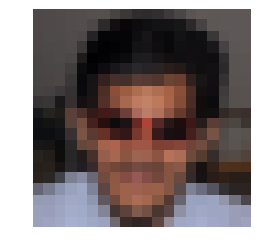

Reconstructed


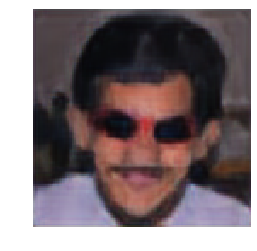

Original


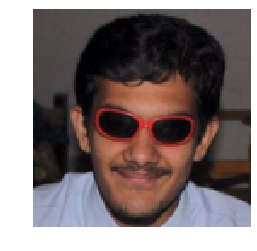

In [17]:
# choose image
i = 11

original = y_test[i]
obfuscated = X_test[i]
predicted = autoencoder.predict(np.array([X_test[i]]))

print("Obfuscated")
plt.axis('off')
plt.imshow(obfuscated)
plt.show()

print("Reconstructed")
plt.axis('off')
plt.imshow(predicted[0])
plt.show()

print("Original")
plt.axis('off')
plt.imshow(original)
plt.show()

In [18]:
# Evaluation
ssim_value = ssim(obfuscated, original, multichannel=True) # b/w obfuscated and original
print(ssim_value)

0.7111617658135646


In [19]:
# Evaluation
ssim_value = ssim(np.array(predicted[0], dtype='float'), original, multichannel=True) # b/w reconstructed and original
print(ssim_value)

0.8005485017033033


# Pixelated - 20 (MSE)

In [25]:
# load pre-trained model
autoencoder = load_model('hamara_auto_20-mse_pixelated-1556791710.hd5')

Obfuscated


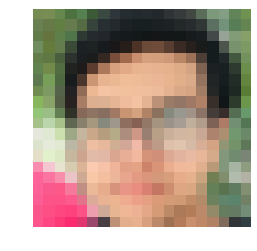

Reconstructed


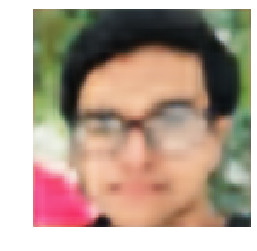

Original


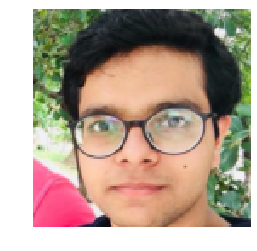

In [26]:
# choose image
i = 12

original = y_test[i]
obfuscated = X_test[i]
predicted = autoencoder.predict(np.array([X_test[i]]))

print("Obfuscated")
plt.axis('off')
plt.imshow(obfuscated)
plt.show()

print("Reconstructed")
plt.axis('off')
plt.imshow(predicted[0])
plt.show()

print("Original")
plt.axis('off')
plt.imshow(original)
plt.show()

In [27]:
# Evaluation
ssim_value = ssim(obfuscated, original, multichannel=True) # b/w obfuscated and original
print(ssim_value)

0.5997615836225552


In [28]:
# Evaluation
ssim_value = ssim(np.array(predicted[0], dtype='float'), original, multichannel=True) # b/w reconstructed and original
print(ssim_value)

0.7019805275660228
